## Natural Computing Assignment 4 (Classifier Combining, Bagging & Boosting)
####  Katrin Bujari(s1005213) Simge Ekiz(s4706757), Luca Parola(s1009497),

## Question 1.5

## Question 1.6

In [1]:
import math
from numpy import argsort as np_argsort
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

### Data Preparation

#####  Load and Preprocess  Spambase Data

In [3]:
# Load the columns names 
column_names = open('data/spambase/spambase-feature-names.txt', 'r').read().splitlines()
column_names.append('label')

# Load the data
spam_data = pd.read_csv('data/spambase/spambase.data', names=column_names)

# Print first two rows
spam_data.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


##### Load and Preprocess Titanic Data

In [4]:
# Load and select the columns are going to be used
titanic_data = pd.read_csv('data/titanic/train.csv')
titanic_data = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

# Rename Survived as label for compatibility with the random_forester function
titanic_data = titanic_data.rename(index=str, columns={'Survived': 'label'})

# Replace string values with integers in Sex and Embarked
titanic_data['Sex'] = titanic_data['Sex'].replace(['male', 'female'], [0, 1])
titanic_data['Embarked'] = titanic_data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

# Substitute missing values in Age, Embarked & Fare;
titanic_data["Age"] = titanic_data["Age"].fillna(titanic_data["Age"].median())
titanic_data["Fare"] = titanic_data["Fare"].fillna(titanic_data["Fare"].median())
titanic_data["Embarked"] = titanic_data["Embarked"].fillna(titanic_data["Embarked"].median())

# Print first two rows
titanic_data.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,0,22.0,1,0,7.2500,0.0,0
1,1,1,38.0,1,0,71.2833,1.0,1


### Classification

In [46]:
def random_forester(data, parameters, print_report=True, print_ranking=False, draw_chart=True, test_size=0.33):
    
    X = data.loc[:, data.columns != 'label']
    y = data.label.values
    
    # Split data as train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Initialize and fit RandomForestClassifier with the given parameters
    forest = RandomForestClassifier(**parameters)
    forest.fit(X_train, y_train)
    
    # Predict labels for test data and print classification report
    if print_report:
        predictions = forest.predict(X_test)
        print("Classification Report:\n")
        print(classification_report(y_test, predictions))
    
    # Calculate feature importance
    importances = forest.feature_importances_
    
    # Sort the features based on importance
    if print_ranking or draw_chart:
        indices = np_argsort(importances)[::-1]
    
    # Print the importance ranking of features
    if print_ranking:
        rankind_df = pd.DataFrame(columns=['feature_name', 'score'])
        for f in range(X_range):
            rankind_df.loc[f] = [X.columns[indices[f]], importances[indices[f]]]
        print('Ranking of feature importances:')
        print(rankind_df)
        
    # Visualize features and their importances
    if draw_chart:
        plt.figure(figsize=(15, 6))
        plt.title("Feature Importances")
        plt.bar(range(X.shape[1]), [imp*100 for imp in importances[indices]], color="b", align="center")
        plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
        plt.xlim([-1, X.shape[1]])
        plt.xlabel("Features (a.k.a variables)")
        plt.ylabel("Importance Ratio (%)")
        plt.show()

# Feature Importances

Using the built-in calculator in scikit-learn for the best estimator chosen by grid search classifier

### Varieting the parameter max_features for Spambase Dataset

Here we set the max_features parameter to 1, square root of total number of features and finally to the total number of features.


-----------------  Setting max_features parameter to 1 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.92      0.98      0.95       886
          1       0.97      0.88      0.92       633

avg / total       0.94      0.94      0.94      1519



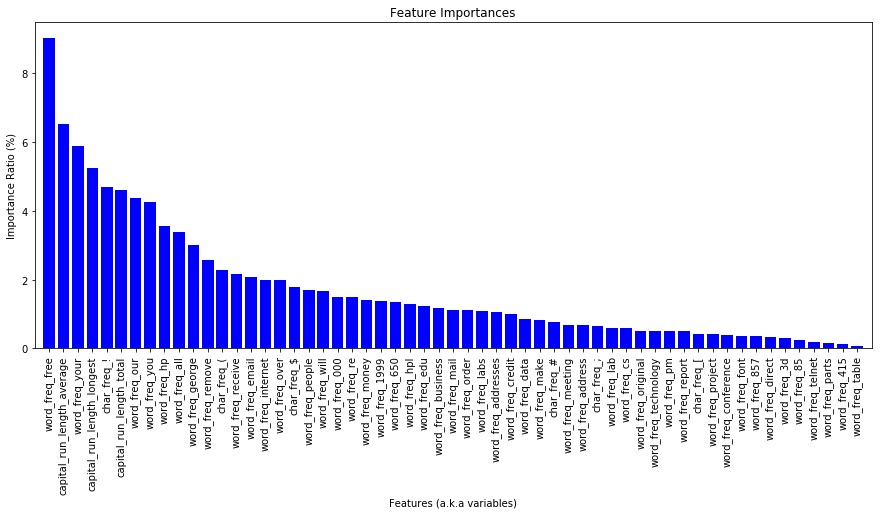


-----------------  Setting max_features parameter to 7 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.93      0.98      0.95       886
          1       0.96      0.90      0.93       633

avg / total       0.95      0.95      0.95      1519



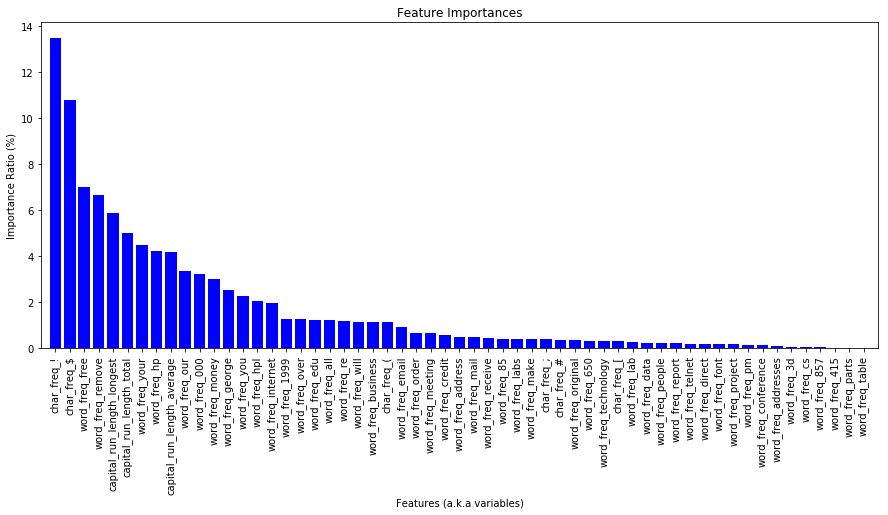


-----------------  Setting max_features parameter to 57 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.92      0.97      0.94       886
          1       0.95      0.88      0.91       633

avg / total       0.93      0.93      0.93      1519



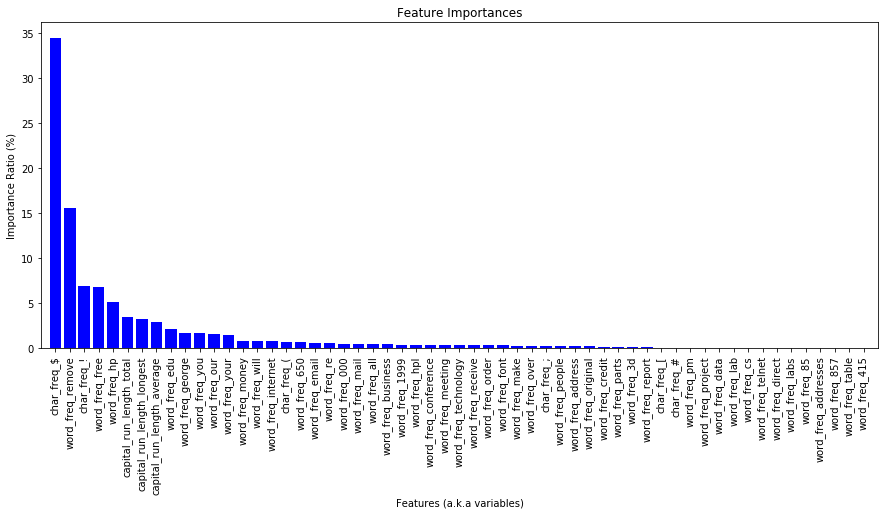

In [61]:
data = spam_data

total_num_features = data.shape[1]-1

max_features_options = [1, int(math.sqrt(total_num_features)), total_num_features]

for max_feat_param in max_features_options:
    print('\n-----------------  Setting max_features parameter to {} ----------------\n'.format(max_feat_param))
    parameters = {'max_features': max_feat_param}
    random_forester(data, parameters)

### Varieting the parameter max_features for Titanic Dataset


-----------------  Setting max_features parameter to 1 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.80      0.86      0.83       175
          1       0.78      0.69      0.73       120

avg / total       0.79      0.79      0.79       295



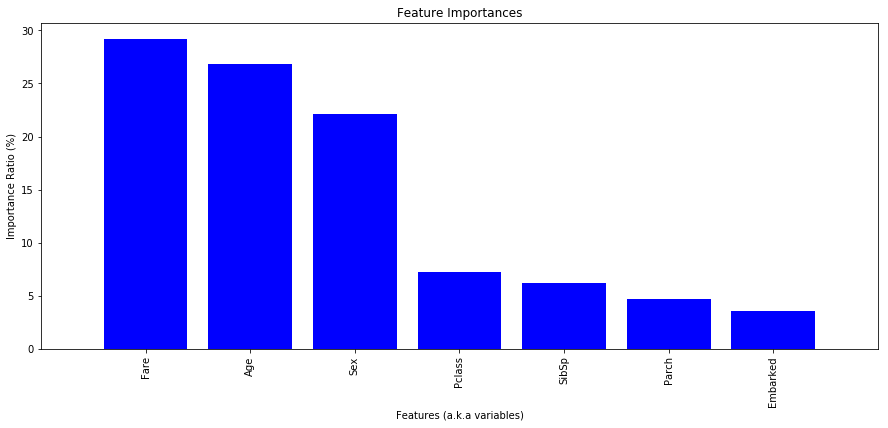


-----------------  Setting max_features parameter to 2 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       175
          1       0.81      0.73      0.77       120

avg / total       0.82      0.82      0.82       295



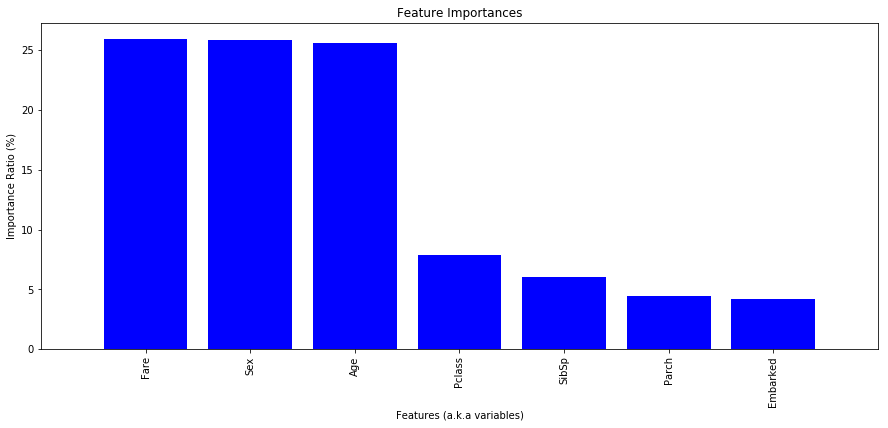


-----------------  Setting max_features parameter to 7 ----------------

Classification Report:

             precision    recall  f1-score   support

          0       0.79      0.85      0.82       175
          1       0.75      0.68      0.71       120

avg / total       0.77      0.78      0.77       295



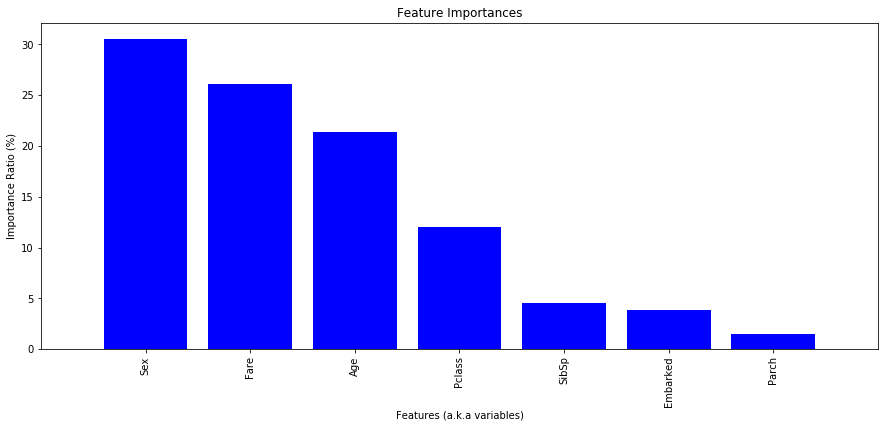

In [62]:
data = titanic_data

total_num_features = data.shape[1]-1

max_features_options = [1, int(math.sqrt(total_num_features)), total_num_features]

for max_feat_param in max_features_options:
    print('\n-----------------  Setting max_features parameter to {} ----------------\n'.format(max_feat_param))
    parameters = {'max_features': max_feat_param}
    random_forester(data, parameters)